# Q1. What is Min-Max scaling, and how is it used in data preprocessing? Provide an example to illustrate its application.

Min-Max scaling, also known as normalization, is a data preprocessing technique used to scale numerical features within a specific range. It transforms the original values of the features to a new range, typically between 0 and 1, making them comparable and suitable for machine learning algorithms that are sensitive to the scale of input features.

X(scaled)=(X-Xmin)/(Xmax-Xmin)


X is the original feature value.

Xmin is the minimum value of feature in dataset.

Xmax is the maximum value of the feature in dataset.

Xscaled is the scaled value of feature after applying min-max scaling.


Suppose you have a dataset of house prices with the following values for the "square footage" feature:
[1000,1500,2000,1200,1800]

To apply Min-Max scaling to this dataset, you would follow these steps:

Calculate the minimum and maximum values of the "square footage" feature:

Xmin=1000
Xmax=2000

Apply the Min-Max scaling formula to each data point:
For X=1000: Xscaled=(1000-1000)/(2000-1000)=0
for X=1500: Xscaled=(1500-1000)/(2000-1000)=0.5
for X=2000: Xscaled=(2000-1000)/(2000-1000)=1
for X=1200: Xscaled=(1200-1000)/(2000-1000)=0.2
for X=1800: Xscaled=(1800-1000)/(2000-1000)=0.8


# Q2. What is the Unit Vector technique in feature scaling, and how does it differ from Min-Max scaling? Provide an example to illustrate its application.

The Unit Vector technique, also known as Unit Norm or Normalization, is a feature scaling method used in machine learning to scale and normalize the features of a dataset. The goal of this technique is to ensure that each feature has a magnitude of 1, effectively transforming the features into a unit vector

Here's how the Unit Vector technique works:

For each data point (sample) in the dataset, calculate the magnitude (Euclidean norm) of its feature vector. The magnitude is calculated as the square root of the sum of the squares of the individual feature values.

Divide each feature value by the calculated magnitude. This process scales down the feature values such that the resulting vector has a magnitude of 1.

The formula for the Unit Vector of a feature vector X is given by:
    Unit Vector of X= X/∥X∥

Differing from Min-Max scaling, which scales the features to a specified range (e.g., [0, 1]), the Unit Vector technique doesn't restrict the feature values to a specific range. Instead, it focuses on the direction of the data in feature space.

Person	Height (cm)	  Weight (kg)
A	      175	       70
B	      160	       55
C	      185	       80


Step 1: Calculate the magnitude for each data point's feature vector:

For person A:

Magnitude of feature vector A=square root(175^2+ 70^2)=188.5
Similarly, calculate magnitudes for persons B and C.

Step 2: Divide each feature value by the calculated magnitude:
    For person A:

Normalized Height for A=175/188.85=0.927
Normalized Height for A=70/188.85=0.370

Apply the same normalization process to the other individuals.

In this example, the Unit Vector technique scales down the feature values of each individual's height and weight so that their feature vectors become unit vectors while maintaining the original direction of the data. 

# Q3. What is PCA (Principle Component Analysis), and how is it used in dimensionality reduction? Provide an example to illustrate its application.

Principal Component Analysis (PCA) is a statistical procedure that uses an orthogonal transformation that converts a set of correlated variables to a set of uncorrelated variables.

Principal Component Analysis (PCA) is an unsupervised learning algorithm technique used to examine the interrelations among a set of variables. It is also known as a general factor analysis where regression determines a line of best fit. 

The main goal of Principal Component Analysis (PCA) is to reduce the dimensionality of a dataset while preserving the most important patterns or relationships between the variables without any prior knowledge of the target variables.

STEP 1: STANDARDIZATION
The aim of this step is to standardize the range of the continuous initial variables so that each one of them contributes equally to the analysis.

Mathematically, this can be done by subtracting the mean and dividing by the standard deviation for each value of each variable.

z=value-mean/Standardization

Step2: Covariance Matrix Computation
Covariance measures the strength of joint variability between two or more variables, indicating how much they change in relation to each other. To find the covariance we can use the formula:
cov(x1,x2)=∑(X1i-X1)(X2i-X2)/(n-1)

The value of covariance can be positive, negative, or zeros.

Positive: As the x1 increases x2 also increases.
Negative: As the x1 increases x2 also decreases.
Zeros: No direct relation

Step 3: Compute Eigenvalues and Eigenvectors of Covariance Matrix to Identify Principal Components
AX=λX
for some scalar values  . then λ is known as the eigenvalue of matrix A and X is known as the eigenvector of matrix A for the corresponding eigenvalue.
It can also be written as :
    
    AX-λX=0
    (A-λI)X=0
    

In [1]:
import numpy as np
from sklearn.decomposition import PCA

# Example dataset
data = np.array([[175, 70],
                 [160, 55],
                 [185, 80]])

# Step 1: Standardize the data
mean = np.mean(data, axis=0)
std = np.std(data, axis=0)
standardized_data = (data - mean) / std

# Step 2 and 3: Calculate covariance matrix and eigenvectors/eigenvalues
covariance_matrix = np.cov(standardized_data, rowvar=False)
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

# Step 4: Sort eigenvectors by eigenvalues
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# Step 5: Choose the number of components (eigenvectors)
num_components = 1
selected_components = sorted_eigenvectors[:, :num_components]

# Step 6: Project the data onto the selected components
reduced_data = np.dot(standardized_data, selected_components)

print("Original Data:")
print(data)
print("\nReduced Data:")
print(reduced_data)


Original Data:
[[175  70]
 [160  55]
 [185  80]]

Reduced Data:
[[ 0.22941573]
 [-1.83532587]
 [ 1.60591014]]


Original Dataframe shape : (569, 31)
Inputs Dataframe shape   : (569, 30)


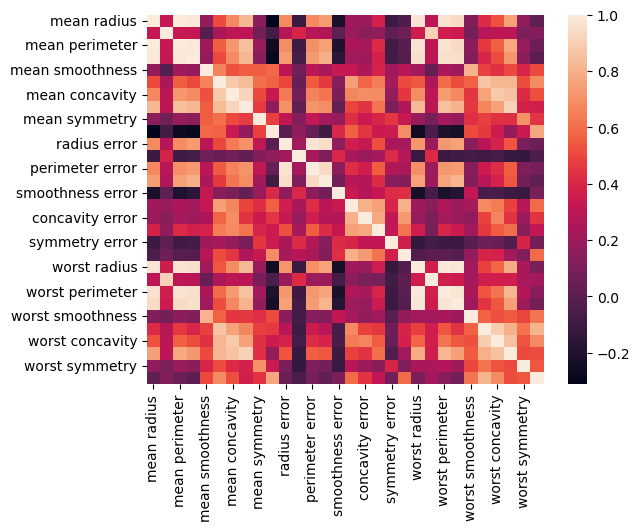

In [2]:
import pandas as pd
import numpy as np
 
# Here we are using inbuilt dataset of scikit learn
from sklearn.datasets import load_breast_cancer
 
# instantiating
cancer = load_breast_cancer(as_frame=True)
# creating dataframe
df = cancer.frame
 
# checking shape
print('Original Dataframe shape :',df.shape)
 
# Input features
X = df[cancer['feature_names']]
print('Inputs Dataframe shape   :', X.shape)

# Mean
X_mean = X.mean()

# Standard deviation
X_std = X.std()

# Standardization
Z = (X - X_mean) / X_std
# covariance
c = Z.cov()

# Plot the covariance matrix
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(c)
plt.show()


Eigen values:
 [1.32816077e+01 5.69135461e+00 2.81794898e+00 1.98064047e+00
 1.64873055e+00 1.20735661e+00 6.75220114e-01 4.76617140e-01
 4.16894812e-01 3.50693457e-01 2.93915696e-01 2.61161370e-01
 2.41357496e-01 1.57009724e-01 9.41349650e-02 7.98628010e-02
 5.93990378e-02 5.26187835e-02 4.94775918e-02 1.33044823e-04
 7.48803097e-04 1.58933787e-03 6.90046388e-03 8.17763986e-03
 1.54812714e-02 1.80550070e-02 2.43408378e-02 2.74394025e-02
 3.11594025e-02 2.99728939e-02]
Eigen values Shape: (30,)
Eigen Vector Shape: (30, 30)


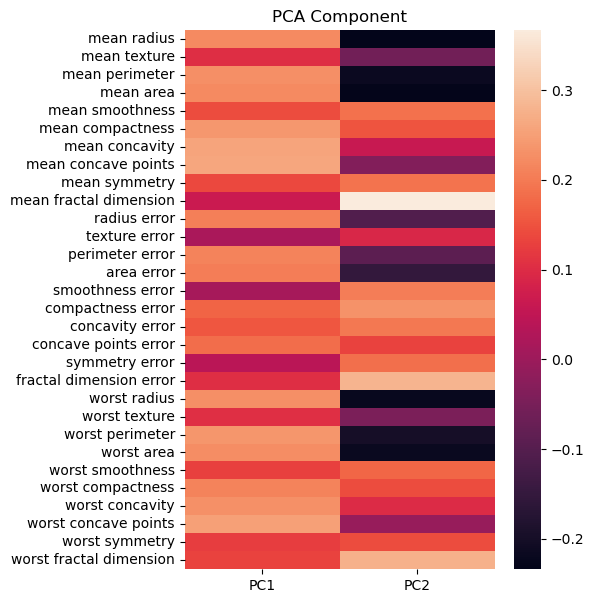

In [3]:
eigenvalues, eigenvectors = np.linalg.eig(c)
print('Eigen values:\n', eigenvalues)
print('Eigen values Shape:', eigenvalues.shape)
print('Eigen Vector Shape:', eigenvectors.shape)

# Sort the eigenvalues in descending order and sort the corresponding eigenvectors accordingly.
# Index the eigenvalues in descending order
idx = eigenvalues.argsort()[::-1]

# Sort the eigenvalues in descending order
eigenvalues = eigenvalues[idx]

# sort the corresponding eigenvectors accordingly
eigenvectors = eigenvectors[:,idx]
explained_var = np.cumsum(eigenvalues) / np.sum(eigenvalues)
explained_var

# Determine the Number of Principal Components 
n_components = np.argmax(explained_var >= 0.50) + 1
n_components

#Project the Data onto the Selected Principal Components
# PCA component or unit matrix
u = eigenvectors[:,:n_components]
pca_component = pd.DataFrame(u,
							index = cancer['feature_names'],
							columns = ['PC1','PC2']
							)

# plotting heatmap
plt.figure(figsize =(5, 7))
sns.heatmap(pca_component)
plt.title('PCA Component')
plt.show()


# Q4. What is the relationship between PCA and Feature Extraction, and how can PCA be used for Feature Extraction? Provide an example to illustrate this concept.

PCA (Principal Component Analysis) and feature extraction are closely related concepts in machine learning and dimensionality reduction. Feature extraction is the process of transforming the original features of a dataset into a new set of features that are more informative or representative of the underlying patterns in the data.

PCA (Principal Component Analysis) is a technique that is commonly used for both dimensionality reduction and feature extraction. While they are related, they are not the same thing. Let's explore the relationship between PCA and feature extraction and see how PCA can be used as a feature extraction method.

Relationship between PCA and Feature Extraction:

PCA as Dimensionality Reduction: PCA is primarily known for its dimensionality reduction capabilities. It finds new orthogonal axes (principal components) in the data space and projects the original data onto these components, aiming to capture as much variance as possible. The principal components are linear combinations of the original features.

PCA as Feature Extraction: Feature extraction involves transforming the original features into a new set of features that represent the data more effectively. PCA can be seen as a form of feature extraction because the principal components extracted by PCA can serve as the new features. These principal components are often chosen such that they represent the most important information in the original data.



In [1]:
from sklearn.decomposition import PCA
import numpy as np

# Example dataset
data = np.array([[2, 3, 5, 6, 7],
                 [4, 5, 7, 8, 9],
                 [1, 2, 4, 3, 6],
                 [5, 6, 8, 7, 9]])

# Apply PCA for feature extraction
num_components = 2
pca = PCA(n_components=num_components)
extracted_features = pca.fit_transform(data)

print("Original Data:")
print(data)
print("\nExtracted Features:")
print(extracted_features)


Original Data:
[[2 3 5 6 7]
 [4 5 7 8 9]
 [1 2 4 3 6]
 [5 6 8 7 9]]

Extracted Features:
[[ 1.6327896  -0.92853424]
 [-2.82086378 -0.75624242]
 [ 4.86075832  0.65278424]
 [-3.67268414  1.03199242]]


# Q5. You are working on a project to build a recommendation system for a food delivery service. The dataset contains features such as price, rating, and delivery time. Explain how you would use Min-Max scaling to preprocess the data.

Min-Max scaling, also known as normalization, is a preprocessing technique used to scale numerical features to a specific range, typically between 0 and 1. This is particularly useful when the features have different scales and ranges, as it ensures that all features contribute equally to the analysis


In [2]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Example dataset with price, rating, and delivery time
data = np.array([[10, 4.5, 30],
                 [20, 3.5, 45],
                 [15, 5.0, 20]])

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the data and transform it
scaled_data = scaler.fit_transform(data)

print("Original Data:")
print(data)
print("\nScaled Data:")
print(scaled_data)


Original Data:
[[10.   4.5 30. ]
 [20.   3.5 45. ]
 [15.   5.  20. ]]

Scaled Data:
[[0.         0.66666667 0.4       ]
 [1.         0.         1.        ]
 [0.5        1.         0.        ]]


# Q6. You are working on a project to build a model to predict stock prices. The dataset contains many features, such as company financial data and market trends. Explain how you would use PCA to reduce the dimensionality of the dataset.

In [3]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Generate synthetic dataset
np.random.seed(42)
num_samples = 100
num_features = 20

data = np.random.rand(num_samples, num_features) * 100  # Random financial and market features

# Step 2: Standardize the data
scaler = StandardScaler()
standardized_data = scaler.fit_transform(data)

# Step 3 and 4: Calculate covariance matrix and perform eigendecomposition
covariance_matrix = np.cov(standardized_data, rowvar=False)
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

# Step 5: Sort eigenvectors by eigenvalues
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# Step 6: Select principal components
num_components = 5  # Example: Retain 5 components
selected_components = sorted_eigenvectors[:, :num_components]

# Step 7: Project the data onto selected components
reduced_data = np.dot(standardized_data, selected_components)

print("Original Data Shape:", standardized_data.shape)
print("Reduced Data Shape:", reduced_data.shape)


Original Data Shape: (100, 20)
Reduced Data Shape: (100, 5)


# Q7. For a dataset containing the following values: [1, 5, 10, 15, 20], perform Min-Max scaling to transform the values to a range of -1 to 1.

In [4]:
import numpy as np

# Original dataset
data = np.array([1, 5, 10, 15, 20])

# Calculate min and max values
min_value = np.min(data)
max_value = np.max(data)

# Apply Min-Max scaling
scaled_data = (data - min_value) / (max_value - min_value) * 2 - 1

print("Original Data:", data)
print("Scaled Data:", scaled_data)


Original Data: [ 1  5 10 15 20]
Scaled Data: [-1.         -0.57894737 -0.05263158  0.47368421  1.        ]


# Q8. For a dataset containing the following features: [height, weight, age, gender, blood pressure], perform Feature Extraction using PCA. How many principal components would you choose to retain, and why?

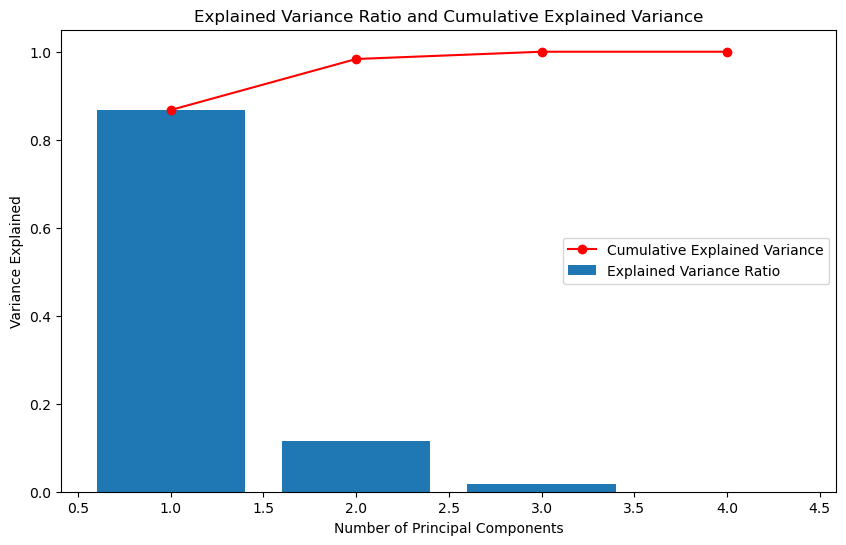

In [5]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Sample dataset (replace this with your actual data)
data = np.array([
    [170, 65, 30, 0, 120],
    [160, 55, 25, 1, 130],
    [180, 75, 40, 0, 140],
    [155, 50, 28, 1, 110],
    # ... add more rows as needed
])

# Perform PCA
pca = PCA()
pca.fit(data)

# Calculate explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Plot explained variance ratio and cumulative explained variance
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, label='Explained Variance Ratio')
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', color='r', label='Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Variance Explained')
plt.title('Explained Variance Ratio and Cumulative Explained Variance')
plt.legend()
plt.show()

# Determine the number of principal components to retain (elbow point)
# You can visually inspect the plot to find the elbow point or use automated methods
